In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd

In [ ]:
import sys

"""
# Curated Fasta file. removed duplicates, similar ones.
# 
#Select only one of these twp
#>KAG8209403.1 RNA-dependent RNA polymerase [Trichophyton interdigitale]
#>KAG8207333.1 RNA-dependent RNA polymerase [Trichophyton interdigitale]

"""
inFile = open("RdRP3.fasta",'r')

headerList = []
seqList = []
currentSeq = ''
for line in inFile:
   if line[0] == ">":
      headerList.append(line[1:].strip())
      if currentSeq != '':
         seqList.append(currentSeq)

      currentSeq = ''
   else:
      currentSeq += line.strip()

seqList.append(currentSeq)

In [ ]:
fheaderList = []
print(len(headerList))
# remove word "RNA dependent RNA polymerase" from Header List
for test_str in headerList:
  res = test_str.find("RNA dependent RNA polymerase")
  if res >= 0:
    test_str = test_str.replace("RNA dependent RNA polymerase","")
    fheaderList.append(test_str)

  res1 = test_str.find("RNA-dependent RNA polymerase")
  if res1 >= 0:
    test_str = test_str.replace("RNA-dependent RNA polymerase","")
    fheaderList.append(test_str)
  
  #res1b = test_str.find("RNA-dependent RNA-polymerase")
  #if res1b >= 0:
  #  test_str = test_str.replace("RNA-dependent RNA-polymerase","")
  #  fheaderList.append(test_str)

  #res2 = test_str.find("RdRp")
  #if res2 >= 0:
   # test_str = test_str.replace("RdRp","")
  #  fheaderList.append(test_str)

  #res3 = test_str.find("RdRP")
  #if res3 >= 0:
  #  test_str = test_str.replace("RdRP","")
  #  fheaderList.append(test_str)
print(len(fheaderList))
#for x in fheaderList:
#  print(x)

161
161


In [ ]:
# SKLEARN _ SINGLE LETTER - TFID VECTORISER

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words={'english'}, analyzer='char', ngram_range=(1,1), min_df=1,max_df=1.0)
#print(len(seqList))

seqList2 = []
for x in seqList:
  seqList2.append(' '.join([char for char in x]))


#seqList=seqList.upper()
#seqList=' '.join([char for char in seqList])
print(len(seqList2))

AAVector = vectorizer.fit_transform(seqList2)
AAVector

161


<161x23 sparse matrix of type '<class 'numpy.float64'>'
	with 3404 stored elements in Compressed Sparse Row format>

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import ward, fcluster
from scipy.spatial.distance import pdist

plt.figure(figsize=(15, 60))
#figsize=(10, 40)
# Calculate the distance between each sample
print(len(AAVector.toarray()))
Zx = linkage(AAVector.toarray(),  'ward')
#print(Z)
# p = 15, Optimum to get all Nodes /leaves absed on Elbow technique, silhoute.
# color threshold = 0.18, this gives 4 Major clusters, with different Colours 
from scipy.cluster.hierarchy import dendrogram, fcluster, leaves_list, set_link_color_palette
set_link_color_palette([ "green","red","blue","orange","black","brown","Teal","Magenta"])
print(len(fheaderList))
print(len(Zx))

dend = dendrogram(Zx, color_threshold=0.14,leaf_font_size=12,labels=fheaderList, orientation='right', 
                  distance_sort='descending',truncate_mode='level',no_plot=True)
#leaf_label_func=llf,
#no_plot=True,
print(dend['color_list'])
print(len(dend['color_list']))
plt.show()

## This Gives FULL Diagram with All 8 major clusters

161
161
160
['green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'b', 'b', 'b', 'brown', 'brown', 'brown', 'brown', 'brown', 'brown', 'brown', 'brown', 'brown', 'brown', 'brown', 'brown', 'brown', 'brown', 'brown', 'brown', 'brown', 'brown', 'brown', 'brown', 'brown', 'brown', 'brown', 'brown', 'brown', 'Teal', 'Teal', 'Teal', 'Teal', 'Teal', 'Teal', 'Teal', 'Teal', '

<Figure size 1080x4320 with 0 Axes>

161
['green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'yellow', 'yellow', 'yellow', 'brown', 'brown', 'brown', 'brown', 'brown', 'brown', 'brown', 'brown', 'brown', 'brown', 'brown', 'brown', 'brown', 'brown', 'brown', 'brown', 'brown', 'brown', 'brown', 'brown', 'brown', 'brown', 'brown', 'brown', 'brown', 'Teal', 'Teal', 'Teal', 'Teal', 'Teal', 'Teal', 'Teal', 'T

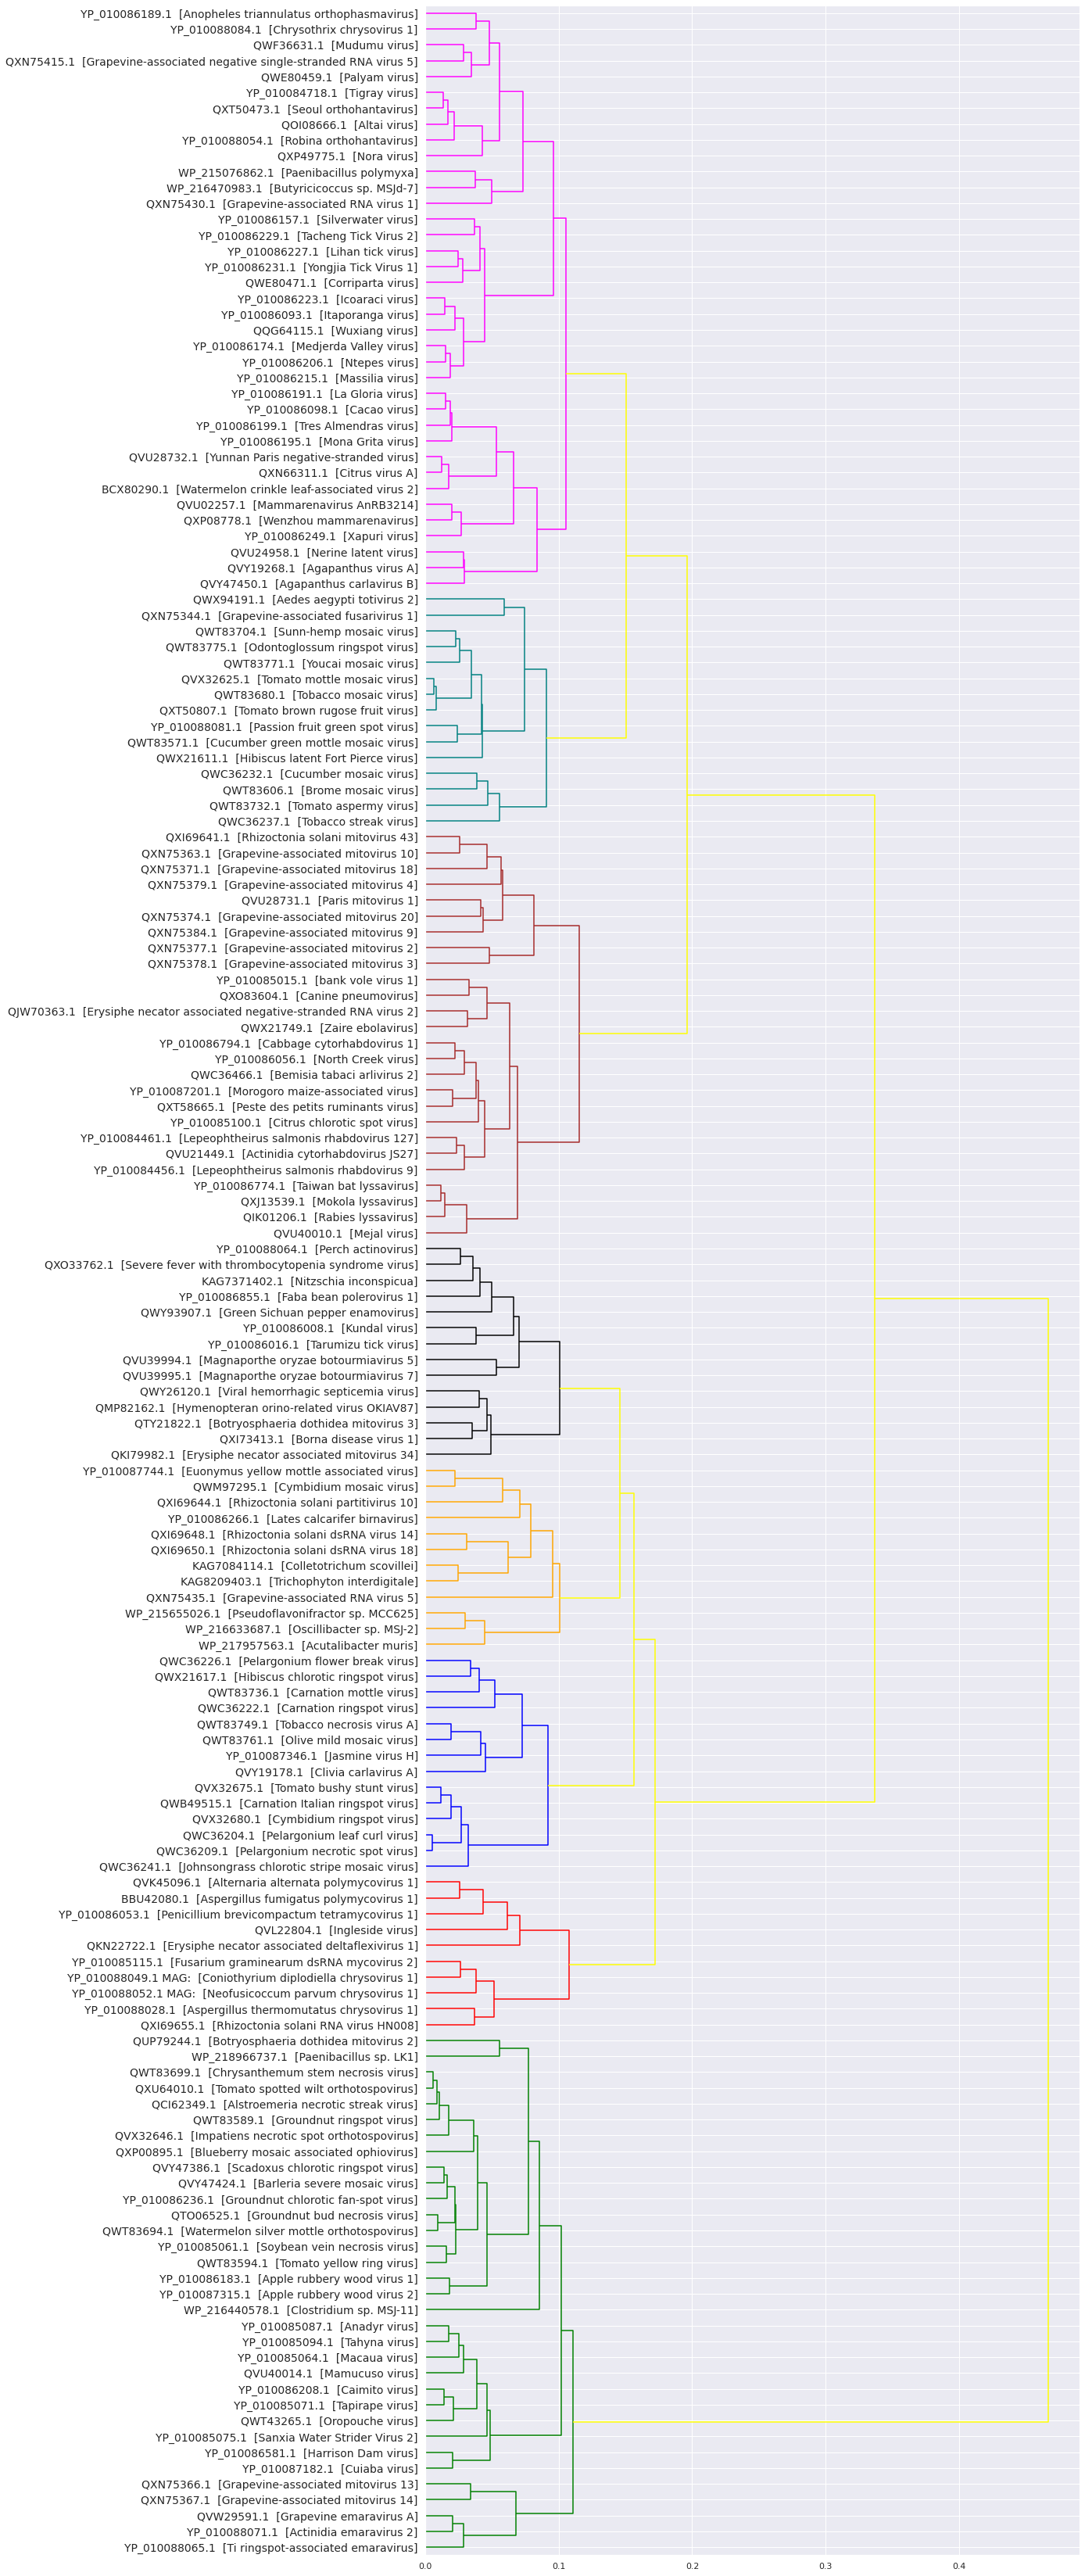

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import ward, fcluster
from scipy.spatial.distance import pdist

plt.figure(figsize=(15, 60))
#figsize=(10, 40)
# Calculate the distance between each sample
print(len(AAVector.toarray()))
Z = linkage(AAVector.toarray(),  'ward')
#print(Z)
# p = 15, Optimum to get all Nodes /leaves absed on Elbow technique, silhoute.
# color threshold = 0.18, this gives 4 Major clusters, with different Colours 
from scipy.cluster.hierarchy import dendrogram, fcluster, leaves_list, set_link_color_palette
set_link_color_palette([ "green","red","blue","orange","black","brown","Teal","Magenta"])

dend = dendrogram(Z, color_threshold=0.14,leaf_font_size=14, p=20,  labels=fheaderList, orientation='right', distance_sort='descending',above_threshold_color='yellow',show_leaf_counts=True)
print(dend['color_list'])
print(len(dend['color_list']))
plt.show()

## This Gives FULL Diagram with All 8 major clusters

In [ ]:
assignments = fcluster(linkage(AAVector.toarray(), method='ward'),0.14,'distance')
#assignments
print(len(assignments))
print(len(fheaderList))
cluster_output = pd.DataFrame({'RdRP organism':fheaderList , 'cluster':assignments})
cluster_output
#print(cluster_output)
newDF =  cluster_output['cluster']==1
finalColor = cluster_output[newDF]
print(len(finalColor))
print('*' * 60)
#print(finalColor.head(50))
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_colwidth', None)
finalColor['RdRP organism']

161
161
33
************************************************************


3           QXU64010.1  [Tomato spotted wilt orthotospovirus]
7                     WP_218966737.1  [Paenibacillus sp. LK1]
10       QXP00895.1  [Blueberry mosaic associated ophiovirus]
23            QXN75367.1  [Grapevine-associated mitovirus 14]
24            QXN75366.1  [Grapevine-associated mitovirus 13]
37                 QVY47424.1  [Barleria severe mosaic virus]
54            QWT83699.1  [Chrysanthemum stem necrosis virus]
55     QWT83694.1  [Watermelon silver mottle orthotospovirus]
58                     QWT83594.1  [Tomato yellow ring virus]
59                     QWT83589.1  [Groundnut ringspot virus]
61                              QWT43265.1  [Oropouche virus]
64                   WP_216440578.1  [Clostridium sp. MSJ-11]
73       YP_010086236.1  [Groundnut chlorotic fan-spot virus]
79                           YP_010085071.1  [Tapirape virus]
80                             YP_010085064.1  [Macaua virus]
81                 QTO06525.1  [Groundnut bud necrosis virus]
84      

In [ ]:
#